<a href="https://colab.research.google.com/github/ahmedSadoun/colab-project/blob/main/xray_dataset_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!apt-get -qq install -y tensorflow

Saving kaggle.json to kaggle.json
E: Unable to locate package tensorflow


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:22<00:00, 142MB/s]
100% 2.29G/2.29G [00:22<00:00, 111MB/s]


In [ ]:
import zipfile
zf = "/content/chest-xray-pneumonia.zip"
target_dir = "/content/drive/MyDrive/x-ray dataset"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [ ]:
from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
import time



In [ ]:
import keras
densenetpath="/content/drive/MyDrive/project models/finalDensenet.h5"
inceptionresnetv2="/content/drive/MyDrive/project models/inceptionresnetv2.h5"
inceptionv3="/content/drive/MyDrive/project models/inceptionv3xray.h5"
mobilenet="/content/drive/MyDrive/project models/mobilnetxray.h5"
resnet50="/content/drive/MyDrive/resnet50.h5"
squeezenet="/content/drive/MyDrive/squeezenet.h5"
vgg16="/content/drive/MyDrive/project models/vgg16.h5"
alexnet="/content/drive/MyDrive/project models/AlexNet_final_save.h5"
xception ="/content/drive/MyDrive/project models/Xception.h5"


paths=[densenetpath,inceptionresnetv2,inceptionv3,mobilenet,resnet50,squeezenet,vgg16,alexnet,xception]
model_name=['densenetpath','inceptionresnetv2','inceptionv3','mobilenet','resnet50','squeezenet','vgg16','alexnet','xception']

def pick_model(model_name):
  model=keras.models.load_model(paths[model_name-1])
  return model



In [ ]:
def choose_image_and_predict(model_name,image_size):
    normal_or_pneumonia = ['NORMAL', 'PNEUMONIA']
    folder_choice = (random.choice(normal_or_pneumonia))
    
    pneumonia_images = glob('/content/drive/MyDrive/x-ray dataset/chest_xray/test/'+folder_choice+'/*')
    img_choice = (random.choice(pneumonia_images))

    img = load_img(img_choice, target_size=(image_size, image_size))
    img = img_to_array(img)
    plt.imshow(img / 255.)
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    model=pick_model(model_name)
    
    t0=time.time()
    pred = model.predict(x)
    t1=time.time()
    print ("predict time:", round(t1-t0, 3), "s")
    pred_class = np.argmax(pred,axis=1)
    print("Actual class:", folder_choice)
    if pred_class[0] == 0:
        print("Predicted class: Normal")
        print("Likelihood:", pred[0][0].round(4))
        if pred[0][0].round(4) < 0.8:
            print("WARNING, low confidence")
    else:
        print("Predicted class: Pneumonia")
        print('Likelihood:', pred[0][1].round(4))
        if pred[0][1].round(4) < 0.8:
            print("WARNING, low confidence") 


In [ ]:
model_image_size=[224,150,200,224,150,227,224,227,180]      
def display_model_name():
    print('choose model numper: \n')
    for i in range(len(model_name)):
      print(i+1,model_name[i])
    x=int(input(" your selection : "))      
    choose_image_and_predict(x,model_image_size[x-1])

choose model numper: 

1 densenetpath
2 inceptionresnetv2
3 inceptionv3
4 mobilenet
5 resnet50
6 squeezenet
7 vgg16
8 alexnet
9 xception
 your selection : 2
predict time: 3.782 s
Actual class: PNEUMONIA
Predicted class: Normal
Likelihood: 1.0


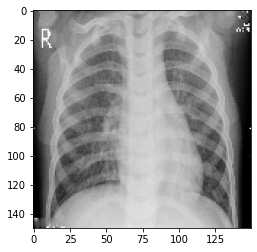

In [ ]:
display_model_name()